<br><br>Tafara Makayi<br>
Jeff Smolinski<br>
4447 Final Project<br>
11/22/2020<br>

In [14]:
import sys
import time
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [242]:
dev_data = pd.read_csv("../data/WDIData.csv", 
                       usecols=["Country Name", "Country Code", "2015", "2016", "2017", "2018", "2019"])

In [243]:
dev_data.head()

,Country Name,Country Code,2015,2016,2017,2018,2019
0,Arab World,ARB,84.171599,84.510171,NaN,NaN,NaN
1,Arab World,ARB,88.720097,89.308602,90.283638,89.286856,NaN
2,Arab World,ARB,78.211000,79.065508,81.102134,79.248100,NaN
3,Arab World,ARB,96.936319,97.290083,97.467915,97.063959,NaN
4,Arab World,ARB,NaN,NaN,37.165211,NaN,NaN


In [11]:
dev_data.sample(10)

,Country Name,Country Code,2015,2016,2017,2018,2019
165960,France,FRA,2.745000e+00,2.872000e+00,2.629000e+00,2.508000e+00,2.443000
242755,Maldives,MDV,5.000000e+04,4.000000e+04,2.000000e+04,3.000000e+04,NaN
131218,"Congo, Dem. Rep.",COD,NaN,NaN,NaN,NaN,NaN
4189,Central Europe and the Baltics,CEB,1.516713e+01,1.663664e+01,1.657680e+01,1.558472e+01,NaN
217996,"Korea, Rep.",KOR,3.121003e+01,3.052459e+01,3.251697e+01,3.634687e+01,32.365027
270116,New Caledonia,NCL,NaN,NaN,NaN,NaN,NaN
228383,Lesotho,LSO,3.603000e+08,2.646225e+08,9.262449e+08,7.860858e+07,NaN
282471,Pakistan,PAK,NaN,NaN,NaN,3.420000e+01,NaN
222417,Kyrgyz Republic,KGZ,4.820000e+08,4.770000e+08,4.800000e+08,4.870000e+08,NaN
191690,"Hong Kong SAR, China",HKG,NaN,NaN,NaN,NaN,NaN


In [23]:
dev_data = pd.read_csv("../data/WDIData.csv")
dev_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [34]:
dev_data_2 = dev_data[['Country Name', 'Country Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [35]:
dev_data_2.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [53]:
dev_data[['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']].isnull().sum(axis = 0)

2000    197824
2001    205835
2002    201035
2003    200357
2004    195017
2005    182287
2006    183618
2007    179702
2008    180328
2009    180278
2010    164544
2011    173795
2012    171021
2013    175954
2014    169081
2015    173321
2016    172632
2017    188422
2018    207180
2019    271505
2020    366138
dtype: int64

In [244]:
nutrition_data = pd.read_csv("../data/ESFA.csv", 
                          usecols= ["SurveyscountryDESC","ExposurehierarchyL1DESC","PopulationGroupL2DESC", 
                                    "avg_chronic", "avg_chronic_bw", "avg_acute"])

In [245]:
nutrition_data[15000:15020]

,SurveyscountryDESC,PopulationGroupL2DESC,ExposurehierarchyL1DESC,avg_chronic,avg_chronic_bw,avg_acute
15000,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",4.485454,0.343773,8.970909
15001,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",4.000000,0.294118,8.000000
15002,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",0.414000,0.031270,0.796154
15003,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",0.243636,0.020104,0.446667
15004,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",0.300000,0.028777,0.600000
15005,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",0.080000,0.005479,0.160000
15006,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",0.224062,0.018299,0.377368
15007,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",0.338750,0.029395,0.677500
15008,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",0.195000,0.016250,0.390000
15009,Estonia,Toddlers,"Legumes, nuts, oilseeds and spices",0.075000,0.007216,0.150000


In [246]:
nutrition_data.sample(3)

,SurveyscountryDESC,PopulationGroupL2DESC,ExposurehierarchyL1DESC,avg_chronic,avg_chronic_bw,avg_acute
105377,Netherlands,Other children,"Starchy roots or tubers and products thereof, ...",73.731681,2.624554,147.463362
23038,France,Elderly,"Fish, seafood, amphibians, reptiles and invert...",18.461538,0.252891,108.000000
281085,Netherlands,Toddlers,Animal and vegetable fats and oils and primary...,2.032143,0.135014,3.556250


In [247]:
nutrition_data.columns = ['Country', 'PopulationGroupL2DESC',
       'ExposurehierarchyL1DESC', 'avg_chronic', 'avg_chronic_bw',
       'avg_acute']

In [248]:
nutrition_data.sample(5)

,Country,PopulationGroupL2DESC,ExposurehierarchyL1DESC,avg_chronic,avg_chronic_bw,avg_acute
2360,Austria,Adolescents,Composite dishes,47.933333,0.961956,143.800000
37350,Hungary,Elderly,Fruit and fruit products,16.666667,0.173611,50.000000
238836,Belgium,Adults,"Seasoning, sauces and condiments",16.615574,0.235253,27.458716
137440,Germany,Adolescents,Vegetables and vegetable products,16.466667,0.411667,49.400000
292396,Romania,Adolescents,"Products for non-standard diets, food imitates...",30.000000,0.447368,30.000000


In [70]:
len(nutrition_data)

307084

In [71]:
nutrition_data.dtypes

Country                     object
PopulationGroupL2DESC       object
ExposurehierarchyL1DESC     object
avg_chronic                float64
avg_chronic_bw             float64
avg_acute                  float64
dtype: object

In [69]:
nutrition_data.info

<bound method DataFrame.info of                Country PopulationGroupL2DESC          ExposurehierarchyL1DESC  \
0              Austria                Adults              Alcoholic beverages   
1              Austria                Adults              Alcoholic beverages   
2              Austria                Adults              Alcoholic beverages   
3              Austria                Adults              Alcoholic beverages   
4              Austria                Adults              Alcoholic beverages   
...                ...                   ...                              ...   
307079  United Kingdom              Toddlers  Water and water-based beverages   
307080  United Kingdom              Toddlers  Water and water-based beverages   
307081  United Kingdom              Toddlers  Water and water-based beverages   
307082  United Kingdom              Toddlers  Water and water-based beverages   
307083  United Kingdom              Toddlers  Water and water-based beverages

In [100]:
#nutrition_data_country = nutrition_data.groupby('Country')
#nutrition_data_country.head(3)

In [114]:
len(nutrition_data[nutrition_data['Country'] == 'Spain'])

20074

In [253]:
nutrition_data_group = nutrition_data.groupby(by=['Country'])
nutrition_data_group.head()

,Country,PopulationGroupL2DESC,ExposurehierarchyL1DESC,avg_chronic,avg_chronic_bw,avg_acute
0,Austria,Adults,Alcoholic beverages,533.750000,4.741841,533.750000
1,Austria,Adults,Alcoholic beverages,647.742537,8.468373,647.742537
2,Austria,Adults,Alcoholic beverages,562.500000,8.468146,562.500000
3,Austria,Adults,Alcoholic beverages,875.000000,9.796627,875.000000
4,Austria,Adults,Alcoholic beverages,676.250000,9.383535,676.250000
...,...,...,...,...,...,...
66975,United Kingdom,Adults,Alcoholic beverages,301.210526,3.750554,1136.482270
66976,United Kingdom,Adults,Alcoholic beverages,392.478252,5.067040,1168.514795
66977,United Kingdom,Adults,Alcoholic beverages,403.582170,4.954358,1442.432570
66978,United Kingdom,Adults,Alcoholic beverages,235.007657,2.984832,1023.961934


['Austria', 'Austria', 'Austria', 'Austria', 'Austria']


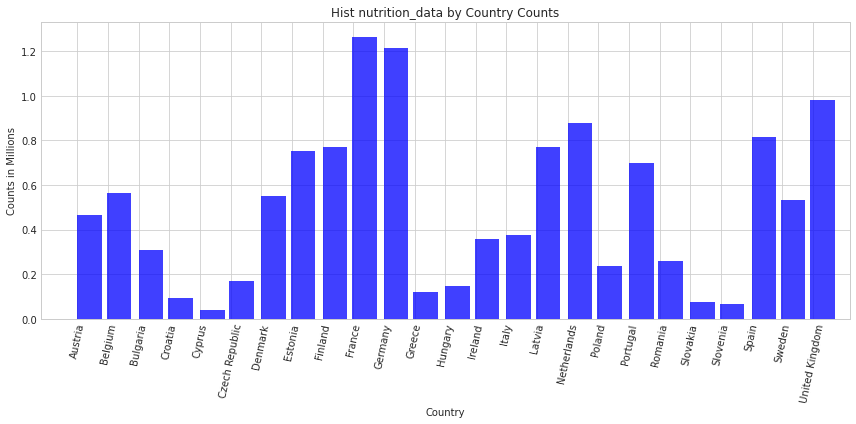

In [221]:
#import matplotlib.colors
#cmap = plt.cm.rainbow
#norm = matplotlib.colors.Normalize(vmin=0, vmax=1200000)

x = nutrition_data['Country'].tolist()
print(x[0:5])

# the histogram of the data
plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(x, 300, density=True, facecolor='b', alpha=0.75, width=0.8, )

plt.xlabel('Country')
plt.ylabel('Counts in Millions')
plt.title('Hist nutrition_data by Country Counts')
plt.xticks(rotation=78)
plt.style.use('seaborn-whitegrid')
plt.tight_layout()
#plt.grid(False)
plt.show()

In [132]:
nutrition_means = nutrition_data.groupby('Country').mean()
nutrition_means

,avg_chronic,avg_chronic_bw,avg_acute
Country,,,
Austria,73.046957,1.195994,112.008878
Belgium,53.438021,1.142924,93.155975
Bulgaria,66.980027,2.090993,76.810736
Croatia,59.993159,0.810003,126.939513
Cyprus,45.526776,0.906919,109.515371
Czech Republic,50.392852,1.154393,87.009075
Denmark,25.033536,0.634072,54.192655
Estonia,48.492113,1.274426,76.531734
Finland,35.439645,1.045745,57.991373


In [175]:
nutrition_means

,avg_chronic,avg_chronic_bw,avg_acute
Country,,,
Austria,73.046957,1.195994,112.008878
Belgium,53.438021,1.142924,93.155975
Bulgaria,66.980027,2.090993,76.810736
Croatia,59.993159,0.810003,126.939513
Cyprus,45.526776,0.906919,109.515371
Czech Republic,50.392852,1.154393,87.009075
Denmark,25.033536,0.634072,54.192655
Estonia,48.492113,1.274426,76.531734
Finland,35.439645,1.045745,57.991373


In [186]:
diff.values

array([ 729.71393247,  755.39892888,   61.18608887, 1933.34103438,
       1782.31569776,  652.54786942,  433.1057179 ,  403.63597087,
        272.72420516, 1056.24021535,  682.35729281, 1923.56059266,
       1143.85069515, 1398.82041242,  724.84454716,  731.44630883,
        629.0881374 ,    0.        ,  372.58157471, 1453.83258448,
          0.        ,    0.        ,  527.53086005, 1813.96043942,
       1024.55259777])

In [192]:
nutrition_means.index.tolist()

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'United Kingdom']

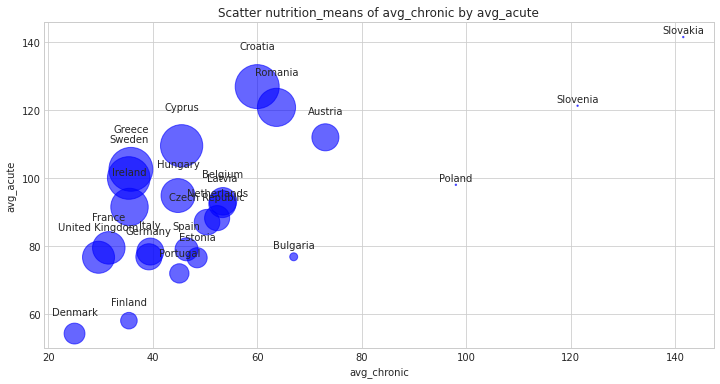

In [216]:
x = nutrition_means['avg_chronic']
y = nutrition_means['avg_acute']

diff = abs(x - y)**1.8+2
diff2 = abs(x - y)/2+4

np.random.seed(19680801)
N = len(x)
colors = abs(x - y)
plt.figure(figsize=(12,6))

plt.xlabel('avg_chronic')
plt.ylabel('avg_acute')
plt.title('Scatter nutrition_means of avg_chronic by avg_acute')
plt.scatter(x, y, s=diff, c='b', alpha=0.6)

l = nutrition_means.index.tolist()

count = 0
for x,y in zip(x,y):
    
    label = f"{l[count]}"

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,diff2[count]), # distance from text to points (x,y)
                 ha='center')
    count += 1
    
plt.show()

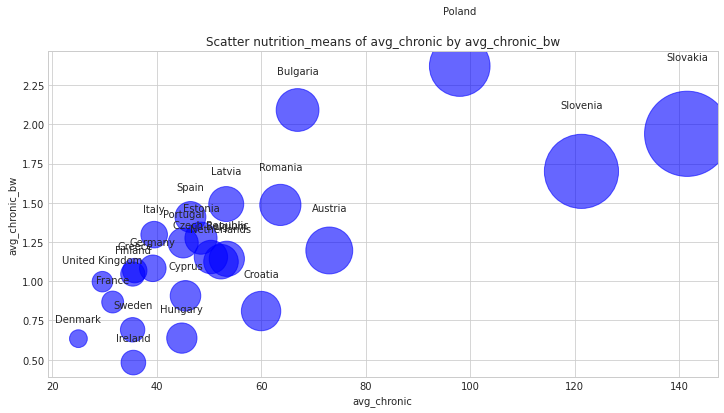

In [215]:
x = nutrition_means['avg_chronic']
y = nutrition_means['avg_chronic_bw']

diff = abs(x - y)**1.8+2
diff2 = abs(x - y)/2+4

np.random.seed(19680801)
N = len(x)
colors = abs(x - y)
plt.figure(figsize=(12,6))

plt.xlabel('avg_chronic')
plt.ylabel('avg_chronic_bw')
plt.title('Scatter nutrition_means of avg_chronic by avg_chronic_bw')
plt.scatter(x, y, s=diff, c='b', alpha=0.6)

l = nutrition_means.index.tolist()

count = 0
for x,y in zip(x,y):
    
    label = f"{l[count]}"

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,diff2[count]), # distance from text to points (x,y)
                 ha='center')
    count += 1
    
plt.show()

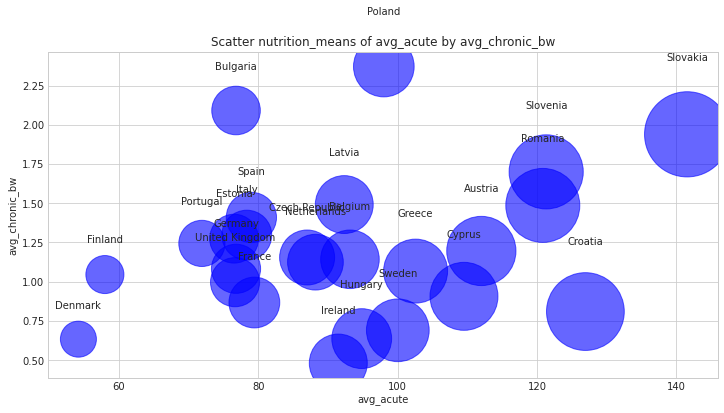

In [214]:
x = nutrition_means['avg_acute']
y = nutrition_means['avg_chronic_bw']

diff = abs(x - y)**1.8+2
diff2 = abs(x - y)/2+4

np.random.seed(19680801)
N = len(x)
colors = abs(x - y)
plt.figure(figsize=(12,6))

plt.xlabel('avg_acute')
plt.ylabel('avg_chronic_bw')
plt.title('Scatter nutrition_means of avg_acute by avg_chronic_bw')
plt.scatter(x, y, s=diff, c='b', alpha=0.6)

l = nutrition_means.index.tolist()

count = 0
for x,y in zip(x,y):
    
    label = f"{l[count]}"

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,diff2[count]), # distance from text to points (x,y)
                 ha='center')
    count += 1
    
plt.show()

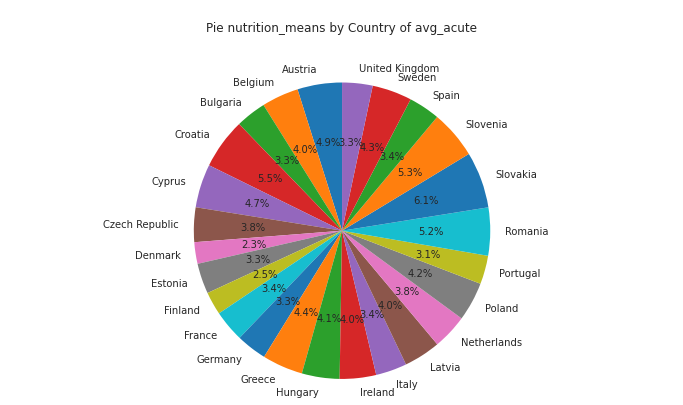

In [241]:
labels=nutrition_means.index.tolist()
sizes=nutrition_means['avg_acute'] # totals 200
z = np.zeros(len(nutrition_means))
explode = tuple(z) # tuple

fig,ax=plt.subplots(figsize=(12,6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('\nPie nutrition_means by Country of avg_acute\n\n')

plt.show()

In [95]:
nutrition_data['Country'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'United Kingdom'], dtype=object)

In [217]:
nutrition_data['Country'].count()

307084

In [ ]:
mortality_data = pd.read_csv("data/HNP_StatsData2.csv", skiprows=4)

In [47]:
mortality_data.columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']

In [52]:
mortality_data.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,232.0,227.8,223.9,219.9,216.1,212.4,...,61.7,59.5,57.2,55.2,53.2,51.3,49.6,48.0,46.5,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.4,67.3,63.7,60.5,57.8,55.6,53.5,51.9,50.2,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.8,10.0,9.3,8.8,8.5,8.4,8.4,8.5,8.6,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,3.9,3.7,3.5,3.3,3.2,3.1,2.9,2.8,NaN


In [50]:
mortality_data = mortality_data[['Country', 'Country Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [64]:
mortality_data.sample(3)

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
129,Liberia,LBR,207.8,208.0,207.9,207.0,205.7,204.0,201.9,199.3,...,70.7,69.2,68.0,67.4,66.1,65.2,64.3,63.3,62.2,NaN
130,Libya,LBY,163.0,154.7,146.8,139.3,132.0,125.1,118.5,112.0,...,13.9,12.9,12.4,11.8,11.4,11.0,10.6,10.2,9.9,NaN
172,Nigeria,NGA,NaN,NaN,NaN,NaN,192.7,188.3,183.9,179.7,...,83.3,82.2,81.2,80.4,79.5,78.5,77.3,75.7,74.2,NaN


In [65]:
len(mortality_data)

264

In [66]:
mortality_data.dtypes

Country          object
Country Code     object
1960            float64
1961            float64
1962            float64
                 ...   
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
Length: 63, dtype: object

In [67]:
mortality_data.info

<bound method DataFrame.info of           Country Country Code   1960   1961   1962   1963   1964   1965  \
0           Aruba          ABW    NaN    NaN    NaN    NaN    NaN    NaN   
1     Afghanistan          AFG    NaN    NaN  232.0  227.8  223.9  219.9   
2          Angola          AGO    NaN    NaN    NaN    NaN    NaN    NaN   
3         Albania          ALB    NaN    NaN    NaN    NaN    NaN    NaN   
4         Andorra          AND    NaN    NaN    NaN    NaN    NaN    NaN   
..            ...          ...    ...    ...    ...    ...    ...    ...   
259        Kosovo          XKX    NaN    NaN    NaN    NaN    NaN    NaN   
260   Yemen, Rep.          YEM    NaN    NaN  279.7  274.2  268.3  261.5   
261  South Africa          ZAF    NaN    NaN    NaN    NaN    NaN    NaN   
262        Zambia          ZMB  121.7  119.8  117.9  116.2  114.8  113.8   
263      Zimbabwe          ZWE   92.8   90.5   88.2   85.8   83.2   80.7   

      1966   1967  ...  2011  2012  2013  2014  2015  2